In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folder='Desktop/CREM'
folder3='Desktop/CREM/Raw Data'
folder2='Desktop/CREM/Data'
os.listdir(folder2)

['production_énergie',
 '.DS_Store',
 'energy_production_v1',
 'energy_importation_v1',
 'global_dataframe',
 'National demographic data',
 'final_energy_consumption_v1',
 'energy_importation_v2',
 'Project data set',
 'utilization_rate_nuclear_centrals_v1.xls']

In [3]:
degre_jour_geneve=pd.read_excel(os.path.join(folder3,'degré.jour_geneve.xlsx'))
degre_jour_geneve['Degré.jour']=degre_jour_geneve['Degré.jour'].apply(pd.to_numeric)
degre_jour_geneve['Année']=degre_jour_geneve['Année'].apply(pd.to_numeric)
degre_jour_geneve.head()

,Année,Degré.jour
0,1993,2641
1,1994,2264
2,1995,2429
3,1996,2740
4,1997,2460


In [4]:
conso_energie=pd.read_csv(os.path.join(folder2,'final_energy_consumption_v1'))
row_names=list(conso_energie.columns)
conso_energie.columns=row_names
conso_energie.head()

,Année,Total (TJ),Combustibles pétroliers (TJ),Carburants (TJ),Électricité (TJ),Gaz (TJ),Charbon (TJ),Bois (TJ),CAD (TJ),Déchets (TJ),ENR (TJ)
0,1910,99990,240,500,3530,2220,76310,17190,0,0,0
1,1911,109490,340,620,4330,2350,84660,17190,0,0,0
2,1912,111190,350,660,5040,2570,85380,17190,0,0,0
3,1913,115670,340,690,5450,2550,89450,17190,0,0,0
4,1914,112640,150,520,5670,2570,86900,16830,0,0,0


In [5]:
df=degre_jour_geneve.merge(conso_energie,how='outer')
df.sort_values('Année',inplace=True)
df.set_index('Année',inplace=True)
df.head()

,Degré.jour,Total (TJ),Combustibles pétroliers (TJ),Carburants (TJ),Électricité (TJ),Gaz (TJ),Charbon (TJ),Bois (TJ),CAD (TJ),Déchets (TJ),ENR (TJ)
Année,,,,,,,,,,,
1910,NaN,99990,240,500,3530,2220,76310,17190,0,0,0
1911,NaN,109490,340,620,4330,2350,84660,17190,0,0,0
1912,NaN,111190,350,660,5040,2570,85380,17190,0,0,0
1913,NaN,115670,340,690,5450,2550,89450,17190,0,0,0
1914,NaN,112640,150,520,5670,2570,86900,16830,0,0,0


<IPython.core.display.Javascript object>


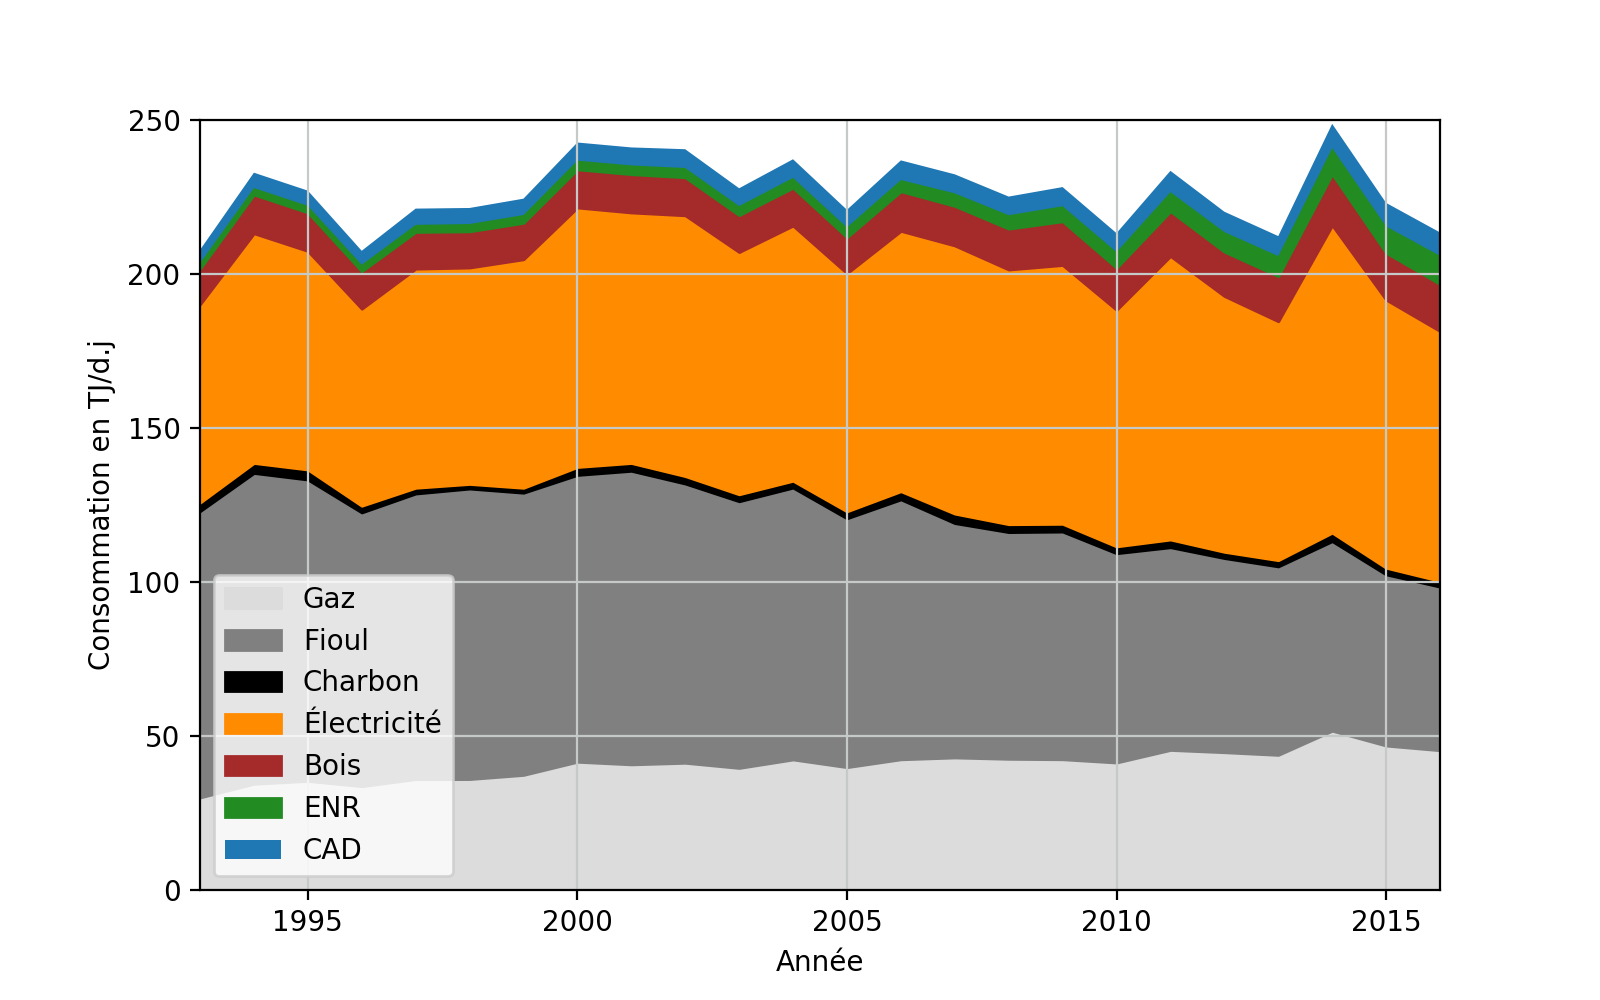

In [6]:
%matplotlib notebook

plt.figure('Évolution du mix énergétique Suisse',figsize=(8,5))
X=df.index

plt.fill_between(X,0,df['Gaz (TJ)']/df['Degré.jour'],label='Gaz',color='gainsboro')
plt.fill_between(X,df['Gaz (TJ)']/df['Degré.jour'],(df['Gaz (TJ)']+df['Combustibles pétroliers (TJ)'])/df['Degré.jour'],label='Fioul',color='grey')
plt.fill_between(X,(df['Gaz (TJ)']+df['Combustibles pétroliers (TJ)'])/df['Degré.jour'],(df['Gaz (TJ)']+df['Combustibles pétroliers (TJ)']+df['Charbon (TJ)'])/df['Degré.jour'],label='Charbon',color='black')
plt.fill_between(X,(df['Gaz (TJ)']+df['Combustibles pétroliers (TJ)']+df['Charbon (TJ)'])/df['Degré.jour'],(df['Gaz (TJ)']+df['Combustibles pétroliers (TJ)']+df['Charbon (TJ)']+df['Électricité (TJ)'])/df['Degré.jour'],label='Électricité',color='darkorange')
plt.fill_between(X,(df['Gaz (TJ)']+df['Combustibles pétroliers (TJ)']+df['Charbon (TJ)']+df['Électricité (TJ)'])/df['Degré.jour'],(df['Gaz (TJ)']+df['Combustibles pétroliers (TJ)']+df['Charbon (TJ)']+df['Bois (TJ)']+df['Électricité (TJ)'])/df['Degré.jour'],label='Bois',color='brown')
plt.fill_between(X,(df['Gaz (TJ)']+df['Combustibles pétroliers (TJ)']+df['Charbon (TJ)']+df['Bois (TJ)']+df['Électricité (TJ)'])/df['Degré.jour'],(df['Gaz (TJ)']+df['Combustibles pétroliers (TJ)']+df['Charbon (TJ)']+df['Bois (TJ)']+df['ENR (TJ)']+df['Électricité (TJ)'])/df['Degré.jour'],label='ENR',color='forestgreen')
plt.fill_between(X,(df['Gaz (TJ)']+df['Combustibles pétroliers (TJ)']+df['Charbon (TJ)']+df['Bois (TJ)']+df['ENR (TJ)']+df['Électricité (TJ)'])/df['Degré.jour'],(df['Gaz (TJ)']+df['Combustibles pétroliers (TJ)']+df['Charbon (TJ)']+df['Bois (TJ)']+df['ENR (TJ)']+df['CAD (TJ)']+df['Électricité (TJ)'])/df['Degré.jour'],label='CAD')

plt.grid(color='xkcd:silver')
plt.axis([1993, 2016,0,250])
plt.xlabel('Année')
plt.ylabel('Consommation en TJ/d.j')
plt.legend(loc='lower left')


<IPython.core.display.Javascript object>


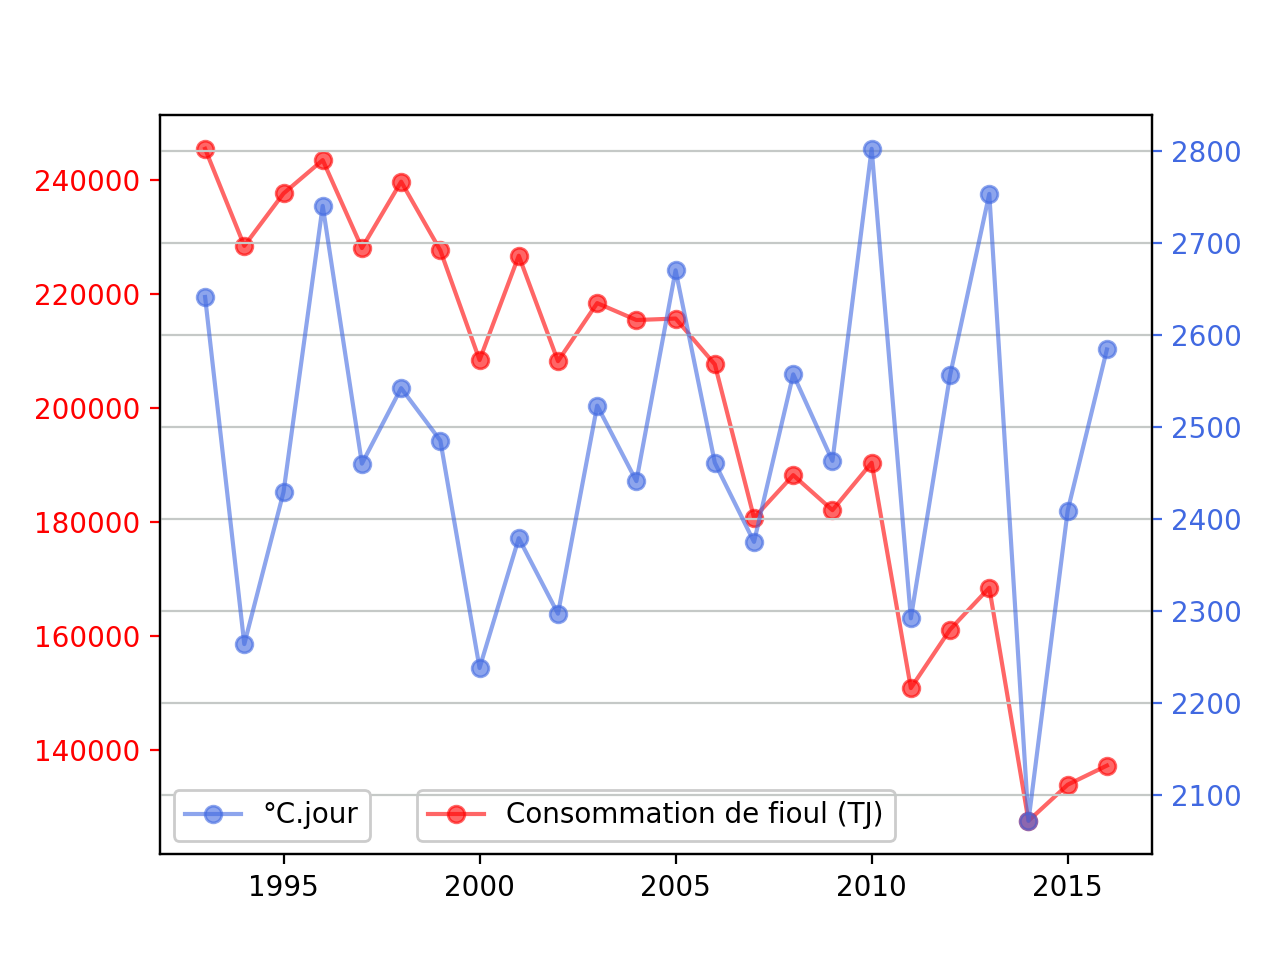

<IPython.core.display.Javascript object>


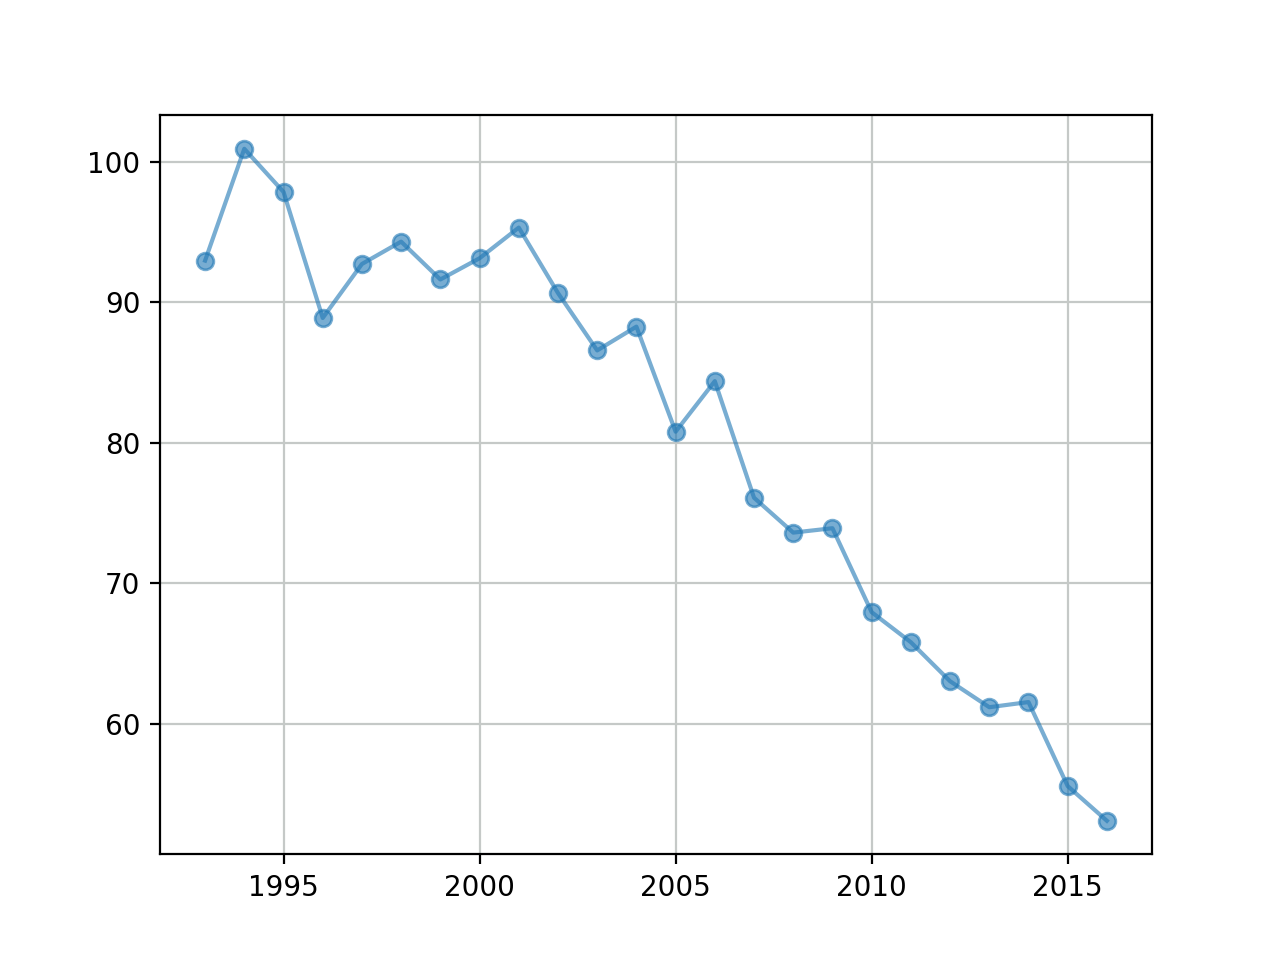

In [14]:
fig, ax1=plt.subplots()

ax1.plot(df.loc[df.index>1992].index,df.loc[df.index>1992,'Combustibles pétroliers (TJ)'],label='Consommation de fioul (TJ)',color='r',marker='o',alpha=0.6)
ax1.tick_params(axis='y',colors='red')
plt.legend(loc=8,framealpha=1)

ax2=ax1.twinx()

ax2.plot(df.loc[df.index>1992].index,df.loc[df.index>1992,'Degré.jour'],label='°C.jour',color='royalblue',marker='o',alpha=0.6)
ax2.tick_params(axis='y',colors='royalblue')
plt.legend(loc=3,framealpha=1)

plt.grid(color='xkcd:silver')

plt.figure('Consommation corrigée')
plt.plot(df.loc[df.index>1992].index,(df.loc[df.index>1992,'Combustibles pétroliers (TJ)'])/(df.loc[df.index>1992,'Degré.jour']),marker='o',alpha=0.6)
plt.grid(color='xkcd:silver')

In [8]:
df.to_csv(os.path.join('desktop/crem/data','global_dataframe'))